In [1]:
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Lambda, Softmax, Dense
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json

2024-04-12 17:52:26.796049: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 17:52:26.858339: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 17:52:27.945137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
inputs = Input(shape=(28,28,1))
out = Lambda(lambda x: x/1000)(inputs)
out = Conv2D(4, 3)(out)
out = Lambda(lambda x: x**2+x)(out)
out = AveragePooling2D()(out)
out = Lambda(lambda x: x*4)(out)
out = Conv2D(8, 3)(out)
out = Lambda(lambda x: x**2+x)(out)
out = AveragePooling2D()(out)
out = Lambda(lambda x: x*4)(out)
out = Flatten()(out)
out = Dense(10, activation=None)(out)
out = Softmax()(out)
full_model = Model(inputs, out)

In [6]:
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 lambda (Lambda)             (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 lambda_1 (Lambda)           (None, 26, 26, 4)         0         
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 4)        0         
 ooling2D)                                                       
                                                                 
 lambda_2 (Lambda)           (None, 13, 13, 4)         0         
                                                             

In [7]:
full_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
    )

In [8]:
full_model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
469/469 [==============================] - 13s 24ms/step - loss: 0.5283 - acc: 0.8401 - val_loss: 0.1636 - val_acc: 0.9486
Epoch 2/15
469/469 [==============================] - 9s 19ms/step - loss: 0.1433 - acc: 0.9586 - val_loss: 0.1069 - val_acc: 0.9664
Epoch 3/15
469/469 [==============================] - 10s 21ms/step - loss: 0.1099 - acc: 0.9675 - val_loss: 0.0891 - val_acc: 0.9737
Epoch 4/15
469/469 [==============================] - 10s 22ms/step - loss: 0.0950 - acc: 0.9721 - val_loss: 0.0765 - val_acc: 0.9771
Epoch 5/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0866 - acc: 0.9738 - val_loss: 0.0733 - val_acc: 0.9773
Epoch 6/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0788 - acc: 0.9766 - val_loss: 0.0667 - val_acc: 0.9793
Epoch 7/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0736 - acc: 0.9777 - val_loss: 0.0670 - val_acc: 0.9795
Epoch 8/15
469/469 [==============================] - 9s 19ms/step

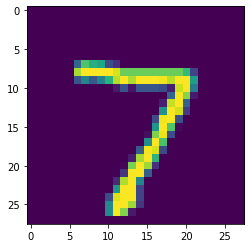

In [9]:
X = X_test[[0]]
plt.imshow(X[0])

In [10]:
model = Model(full_model.input, full_model.layers[-2].output)

In [11]:
y = model.predict(X) - model.weights[5].numpy()

1/1 [==============================] - 0s 103ms/step


In [12]:
input_json = {
    "in": X.astype(int).flatten().tolist(),
    "conv2d_1_weights": (model.weights[0].numpy()*(10**3)).round().astype(int).flatten().tolist(),
    "conv2d_1_bias": (model.weights[1].numpy()*(10**3)*(10**3)).round().astype(int).flatten().tolist(),
    "conv2d_2_weights": (model.weights[2].numpy()*(10**3)).round().astype(int).flatten().tolist(),
    "conv2d_2_bias": (model.weights[3].numpy()*((10**3)**5)).round().astype(int).flatten().tolist(),
    "dense_weights":(model.weights[4].numpy()*(10**3)).round().astype(int).flatten().tolist(),
    "dense_bias": np.zeros(model.weights[5].numpy().shape).tolist()
}

In [13]:
output_json = {
    "scale": 10**-33,
    "out": y.flatten().tolist(),
    "label": int(y_test[0].argmax())
}

In [14]:
with open("CNN2_input.json", "w") as file:
    json.dump(input_json, file)

In [15]:
with open("CNN2_output.json", "w") as file:
    json.dump(output_json, file)